# Runge-Kutta Methods

#### Learning outcomes

On successful completion of this page readers will be able to:

- Identify a Runge-Kutta method and express it using a [Butcher tableau](#Butcher-tableau);
- Distinguish between [explicit and implicit Runge-Kutta methods](#Butcher-tableau-for-explicit-and-implicit-Runge-Kutta-methods);
- Derive an [explicit Runge-Kutta method](#Derivation-of-a-second-order-explicit-Runge-Kutta-method) using the order conditions;
- Apply explicit Runge-Kutta methods to [solve an initial value problem](#Use-of-Explicit-Runge-Kutta-Methods-to-solve-Initial-Value-Problems).

<a id="runge_kutta_methods"></a>[Runge-Kutta methods](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) are a family of numerical methods for solving a first-order [Ordinary Differential Equation](https://en.wikipedia.org/wiki/Ordinary_differential_equation) (ODE). The general form of a Runge-Kutta method for solving the ODE $y'=f(t, y)$ is

```{math}
:label: rk_yn
y_{n+1} = y_n + h\sum_{i=1}^s b_i k_i,
```

```{math}
:label: rk_ki
k_i = f(t_n + c_ih, y_n + h\displaystyle\sum_{j=1}^s a_{ij} k_j).
```

where $t_n$ is some value of the independent variable $t$, $y_n=y(t_n)$ is the value of the function $y$ when $t=t_n$, $h=t_{n+1}-t_n$ is the **step length** between two successive values of $t$. Runge-Methods are called **single step methods** because the solution over a single step $y_{n+1}$ is updated by equation {eq}`rk_yn` using information from the single step $y_n$. The other type of method for solving ODEs are [**multistep methods**](https://en.wikipedia.org/wiki/Linear_multistep_method) that calculate $y_{n+1}$ using information from multiple steps $y_n, y_{n-1}, y_{n-2}, \ldots$ Equation {eq}`rk_ki` calculates intermediate **stage values** $k_i$ where $s$ is the number of stages of the method. The number of stages of a Runge-Kutta method will depend upon the order of the method.

### Butcher tableau

A common method used to express a Runge-Kutta method is to use a **Butcher tableau**. Expanding the summations of the general form of a Runge-Kutta method

$$
\begin{aligned}
    y_{n+1} &= y_n + h(b_1 k_1 + b_2 k_2 + \cdots + b_s k_s), \\
    k_1 &= f(t_1 + c_1 h, y_n + h(a_{11} k_1 + a_{12} k_2 + \cdots + a_{1s} k_s), \\
    k_2 &= f(t_2 + c_2 h, y_n + h(a_{21} k_1 + a_{22} k_2 + \cdots + a_{2s} k_s), \\
    &\vdots \\
    k_s &= f(t_s + c_s h, y_n + h(a_{s1} k_1 + a_{s2} k_2 + \cdots + a_{ss} k_s).
\end{aligned}
$$

It is the values of the coefficients $a_{ij}$, $b_i$ and $c_i$ that define a particular Runge-Kutta method and these values are arranged in tabular form as follows

$$\begin{array}{c|cccc}
c_1 & a_{11} & a_{12} & \cdots & a_{1s} \\
c_2 & a_{21} & a_{22} & \cdots & a_{2s} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
c_s & a_{s1} & a_{s2} & \cdots & a_{ss} \\ \hline
& b_1 & b_2 & \cdots & b_s
\end{array}$$

### Explicit and implicit Runge-Kutta methods

The stage values of a general Runge-Kutta method are

$$
\begin{aligned}
    k_1 &= f(t_1 + c_1 h, y_n + h(a_{11} k_1 + a_{12} k_2 + \cdots + a_{1s} k_s), \\
    k_2 &= f(t_2 + c_2 h, y_n + h(a_{21} k_1 + a_{22} k_2 + \cdots + a_{2s} k_s), \\
    &\vdots \\
    k_s &= f(t_s + c_s h, y_n + h(a_{s1} k_1 + a_{s2} k_2 + \cdots + a_{ss} k_s).
\end{aligned}
$$

Here the equation for calculating the value of $k_1$ includes $k_1$ on the right-hand side and similar for $k_2, k_3, \ldots, k_s$. These are examples of **implicit** equations and Runge-Kutta methods where the stage values are expressed using implicit equations are known as **Implicit Runge-Kutta** (IRK) methods. To calculate the solution of the stage values of an IRK method involves solving a system of equations which is computationally expensive.

If the summation in equation [(2)](#rk) is altered so the upper limit to the sum is $i-1$ term, i.e.,

$$k_i = f(t_n + c_ih, y_n + h\sum_{j=1}^{i-1} a_{ij} k_j),$$

and let $c_1=0$ then we have the following equations for calculating the stage values

$$
\begin{aligned}
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + c_2h, y_n + h a_{21} k_1), \\
    k_3 &= f(t_n + c_3h, y_n + h (a_{31} k_1 + a_{32} k_2)), \\
    &\vdots \\
    k_s &= f(t_n + c_sh, y_n + h (a_{s1} k_1 + a_{s2} k_2 + \cdots + a_{s,s-1} k_{s-1})).
\end{aligned}
$$

These stages values are **explicit** equations where the subject of the equation does not appear on the right-hand side. Runge-Kutta methods where the stages values are calculated using explicit equations are known as **Explicit Runge Kutta** (ERK) methods. Note that we can calculate the stage values in order, i.e., $k_1$ can be calculated using $t_n$ and $y_n$; $k_2$ can be calculated using $t_n$, $y_n$ and $k_1$; $k_3$ can be calculated using $t_n$, $y_n$, $k_1$ and $k_2$ and so on. This means that ERK methods as more computationally efficient than IRK methods, however in certain situations ERK methods cannot be used and we must then use IRK methods (see [Implicit Runge-Kutta Methods](IRK_methods.ipynb)).

### Butcher tableau for explicit and implicit Runge-Kutta methods

ERK and IRK methods can be easily distinguished looking at the Butcher tableau. The $A$ matrix in the top right region of a Butcher tableau for an ERK method (left) is lower-triangular whereas for an IRK method (right) the main-diagonal and upper triangular elements are non-zero.

$$
\begin{aligned}
\begin{array}{c|cccc}
0 &  \\
c_2 & a_{21} \\
c_3 & a_{31} & a_{32} \\
\vdots & \vdots & \vdots & \ddots  \\
c_s & a_{s1} & a_{s2} & \cdots & a_{s,s-1} \\ \hline
& b_1 & b_2 & \cdots & b_{s-1} & b_s
\end{array}
&&&&
\begin{array}{c|cccc}
c_1 & a_{11} & a_{12} & a_{13} & \cdots & a_{1s} \\
c_2 & a_{21} & a_{22} & a_{23} & \cdots & a_{2s} \\
c_3 & a_{31} & a_{32} & a_{33} & \cdots & a_{3s} \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
c_s & a_{s1} & a_{s2} & a_{s3} & \cdots & a_{ss} \\ \hline
& b_1 & b_2 & b_3 & \cdots & b_s
\end{array}
\end{aligned}
$$

---
## Derivation of a second-order explicit Runge-Kutta method

A Runge-Kutta method is derived by comparing the [Taylor series](https://en.wikipedia.org/wiki/Taylor_series) of the general Runge-Kutta method and ensuring the coefficients $a_{ij}$, $b_i$ and $c_i$ match those of the Taylor series expansion of the ODE $y'=f(t, y)$.

The second-order Taylor series expansion of $y(t+h)$ is

$$y_{n+1} = y + hy' + \frac{h^2}{2}y''.$$

Since $y' = f(t, y)$ and applying the [chain rule](https://en.wikipedia.org/wiki/Chain_rule) to differentiate $y'$ we have 

$$y'' = f_t(t, y) + f_y(t, y)f(t, y),$$

then the Taylor series becomes

$$
y_{n+1} = y + hf(t, y) + \frac{h^2}{2}(f_t(t, y) + f_y(t, y)f(t, y)),
$$

which can be written as

```{math}
:label: 2nd_order_taylor
y_{n+1} = y + \frac{h}{2}f(t, y) + \frac{h}{2}(f(t, y) + hf_t(t, y) + hf_y(t, y)f(t,y)).
```

Equation {eq}`2nd_order_taylor` is the second-order Taylor series expansion for the ODE $y'=f(t, y)$. To be consistent, the Taylor series expansion of a numerical method must be equivalent to this.

The general form of a second-order Runge-Kutta method is

```{math}
:label: general_rk2
y_{n+1} = y_n + h b_1 f(t_n, y_n) + h b_2 f(t + c_2h, y + h a_{21} f(t_n, y_n)).
```

To write this in a form comparable to equation {eq}`2nd_order_taylor` we can use the first-order bivariate Taylor series which is 

$$f(t + h, y + k) = f(t, y) + h f_t(t, y) + k f(t, y) f_y(t, y),$$

so the Taylor series expansion of $f(t_n + c_2h, y_n + h a_{21} f(t_n, y_n))$ is

$$f(t_n + c_2h, y_n + h a_{21} f(t_n,y_n)) = f(t_n, y_n) + h c_2 f_t(t_n, y_n) + h a_{21} f(t_n, y_n) f_y(t_n, y_n),$$

which is substituted into equation {eq}`general_rk2` to give

```{math}
:label: rk_taylor
y_{n+1} = y_n + h b_1 f(t_n, y_n) + h b_2 (f(t_n, y_n) + h c_2 f_t(t_n, y_n) + h a_{21} f(t_n, y_n) f_y(t_n, y_n)).
```

Equating {eq}`2nd_order_taylor` and {eq}`rk_taylor` we see that

$$
\begin{aligned}
    b_1 + b_2 &= 1, \\
    c_2b_2 &= \frac{1}{2}, \\
    a_{21}b_2 &= \frac{1}{2}.
\end{aligned}
$$

Here we have a system of 3 equations expressed in the 4 unknowns $b_1$, $b_2$, $c_2$ and $a_{21}$. These equations are known as the **order conditions** for a second-order Runge-Kutta method. To derive a second-order ERK method we choose a value for one of these coefficients and solve for the others.

#### Example 1

Derive an ERK method where $c_2 = 1$.

The code below uses the `solve` command from the `sympy` library to solve the order conditions for a second-order ERK method.

In [1]:
from sympy import *

# Initialise symbolic variables
b1, b2, c2, a21 = symbols('b1, b2, c2, a21')
c2 = 1

# Define order conditions
eqn1 = b1 + b2 - 1
eqn2 = c2 * b2 - Rational('1 / 2')
eqn3 = a21 * b2 - Rational('1 / 2')

# Solve system
solve((eqn1, eqn2, eqn3))

[{a21: 1, b1: 1/2, b2: 1/2}]

So $a_{21}=1$ and $b_1=b_2=\frac{1}{2}$ so this second-order ERK method is

$$
\begin{aligned}
y_{n+1} &= y_n + \frac{h}{2}(k_1 + k_2), \\
k_1 &= f(t_n, y_n), \\
k_2 &= f(t_n + h, y_n + h k_1),
\end{aligned}
$$

or expressed using a Butcher tableau

$$\begin{array}{c|cc}
0 &  \\
1 & 1 &  \\ \hline
& \frac{1}{2} & \frac{1}{2}
\end{array}$$

This Runge-Kutta method is known as *the* second-order Runge-Kutta method or RK2 for short.

---
## Use of Explicit Runge-Kutta Methods to solve Initial Value Problems

Runge-Kutta methods are used to solve [Initial Value Problems](https://en.wikipedia.org/wiki/Initial_value_problem) (IVP) of the form

\begin{align*}
    y' &= f(t, y), & t &\in [t_{\min}, t_{\max}], & y(t_{\min}) &= y_0,
\end{align*}

where $y'=f(t,y)$ is a first-order ODE defined over the domain $t\in [t_{\min}, t_{\max}]$ and the initial solution $y(t_{\min})$ is the known value $y_0$. 

To apply the an ERK method to solve an IVP we calculate the stage values $k_1$ and $k_2$ using the known values of $t_n$, $y_n$ and the step length $h$ substituted into the ODE function $f(t, y)$. Then the solution over one step $t_{n+1} = t_n + h$ and $y_{n+1} = y(t_{n+1})$ is then calculated using $k_1, k_2, \ldots, k_s$.

#### Example 2

Calculate the first two steps of the [RK2 method](#rk2) to solve the following IVP

\begin{aligned}
    y' &= \sin^2(t)y, & t &\in [0, 5], & y(0) &= 1.
\end{aligned}

using a step length of $h=0.5$.

Step 1: $t_0=0$ and $y_0=1$

$$
\begin{aligned}
    k_1 &= \sin^2(t_0)y_0  = \sin^2(0)(1) = 0, \\
    k_2 &=  \sin^2(t_0 + h)(y_0 + hk_1) = \sin^2(0 + 0.5)(1 + 0.5(0)) = 0.2298, \\
    y_1 &= y_0 + \frac{h}{2}(k_1 + k_2) = 1 + \frac{0.5}{2}(0 + 0.2298) = 1.0575, \\
    t_1 &= t_0 + h = 0 + 0.5 = 0.5.
\end{aligned}
$$

Step 2: $t_1 = 0.5$ and $y_1 = 1.0575$

$$
\begin{aligned}
    k_1 &= \sin^2(t_1)y_1 = \sin^2(0.5)(1.0575) = 0.2431, \\
    k_2 &= \sin^2(t_1 + h)(y_1 + hk_1) = \sin^2(0.5 + 0.5)(1.0575 + 0.5(0.2431)) = 0.8348, \\
    y_2 &= y_1 + \frac{h}{2}(k_1 + k_2) = 1.0575 + \frac{0.5}{2}(0.2431 + 0.8349) = 1.3269.
\end{aligned}
$$

#### Example 3

Calculate the solution of the IVP from [example 2](#Example-2) over the whole domain $t\in [0,5]$ using the Euler method with a step length of $h=0.5$ and compare it to the exact solution given by

$$y = e^{(t - \sin(t)\cos(t))/2}$$

The functions below defines the right-hand side of the ODE and the exact solution to the IVP.

In [2]:
def f(t, y):
    return np.sin(t)**2 * y

def exact_sol(t):
    return np.exp(0.5 * (t - np.sin(t) * np.cos(t)))

The code below defines a function `rk2` that solves an IVP using the RK2 method. The input arguments are `f` is the name of the function the defines the ODE, `tspan` is a two-element array containing the lower and upper bounds of the $t$ domain, `y0` is the initial value of $y$ at the lower bound and `h` is the step length.
<a id="rk2_code"></a>

In [3]:
def rk2(f, tspan, y0, h):
    '''
    Calculates the solution to an IVP using the second-order Runge-Kutta method
    '''
    # Initialise solution arrays
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0

    # Solver loop
    for n in range(nsteps):
        k1 = f(t[n], y[n])
        k2 = f(t[n] + h, y[n] + h * k1)
        y[n + 1] = y[n] + 0.5 * h * (k1 + k2)
        t[n + 1] = t[n] + h

    return t, y

The program below invokes the RK2 method to solve this IVP and compares it to the exact solution.

 t     RK2    Exact
--------------------
0.00  1.0000  1.0000
0.50  1.0575  1.0404
1.00  1.3269  1.3135
1.50  2.0088  2.0436
2.00  3.1302  3.2845
2.50  4.1734  4.4359
3.00  4.5716  4.8059
3.50  4.7364  4.8830
4.00  5.6020  5.7699
4.50  8.1257  8.5589
5.00 12.8273 13.9573


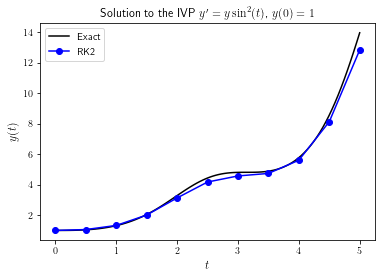

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

# Define IVP parameters
tspan = [ 0, 5 ]
y0 = 1
h = 0.5

# Invoke the RK2 method to solve IVP
t, y = rk2(f, tspan, y0, h)

# Output solution table
print(' t     RK2    Exact\n' + '-' * 20)
for n in range(len(t)):
    print('{:3.2f} {:7.4f} {:7.4f}'.format(t[n], y[n], exact_sol(t[n])))

# Plot solutions
fig, ax = plt.subplots()

t1 = np.linspace(tspan[0], tspan[1], 100)
ax.plot(t1, exact_sol(t1), 'k-', label='Exact')
ax.plot(t, y, 'bo-', label='RK2')

ax.set_title("Solution to the IVP $y'=y\sin^2(t)$, $y(0) = 1$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

Here we can see that the RK2 solution follows the approximate shape of the exact solution, however, there are still noticeable errors in the numerical solution. Use of a higher order ERK would improve the accuracy of the numerical results.

---
## Derivation of a fourth-order explicit Runge-Kutta method

The order conditions for a fourth-order ERK method are

$$
\begin{aligned}
    b_1 + b_2 + b_3 + b_4 &= 1, \\
    b_2c_2 + b_3c_3 + b_4c_4 &= \frac{1}{2}, \\
    b_2c_2^2 + b_3c_3^2 + b_4c_4^2 &= \frac{1}{3}, \\
    b_2c_2^3 + b_3c_3^3 + b_4c_4^3 &= \frac{1}{4}, \\
    b_3c_3a_{32}c_2 + b_4c_4(a_{42}c_2 + a_{43}c_3) &= \frac{1}{8}, \\
    b_3a_{32} + b_4a_{42} &= b_2(1 - c_2), \\
    b_4a_{43} &= b_3(1 - c_3), \\
    0 &= b_4(1 - c_4).
\end{aligned}
$$

A feature of Runge-Kutta methods is the **row sum condition** that states

$$c_i = \sum_{j=1}^s a_{ij},$$

i.e., the value of $c_i$ is equal to the sum of row $i$ of the matrix $A$. Therefore, the values of $a_{21}$, $a_{31}$ and $a_{41}$ are

$$
\begin{aligned}
    c_2 &= a_{21}, \\
    c_3 &= a_{31} + a_{32}, \\
    c_4 &= a_{41} + a_{42} + a_{43}.
\end{aligned}
$$

To solve for the unknowns we choose 4 values from $b_1$, $b_2$, $b_3$, $b_4$, $c_2$, $c_3$ and $c_4$ and solve the order conditions for the remaining unknowns.

#### Example 4

Derive a fourth-order Runge-Kutta method where $c_2 = c_3 = \frac{1}{2}$ and $c_4=1$ and $b_2=\frac{1}{3}$.

The code below defines and solves the order conditions and row sum conditions for a fourth-order ERK method.

In [5]:
# Initialise symbolic variables
b1, b2, b3, b4 = symbols('b1, b2, b3, b4')
c2, c3, c4 = symbols('c2, c3, c4')
a31, a32, a41, a42, a43 = symbols('a31, a32, a41, a42, a43')
c2, c3, c4, b2 = Rational('1 / 2'), Rational('1 / 2'), 1, Rational('1 / 3')

# Define order conditions
eqn1 = b1 + b2 + b3 + b4 - 1
eqn2 = b2 * c2 + b3 * c3 + b4 * c4 - Rational('1 / 2')
eqn3 = b2 * c2**2 + b3 * c3**2 + b4 * c4**2 - Rational('1 / 3')
eqn4 = b2 * c2**3 + b3 * c3**3 + b4 * c4**3 - Rational('1 / 4')
eqn5 = b3 * c3 * a32 * c2 + b4 * c4 * (a42 * c2 + a43 * c3) - Rational('1 / 8')
eqn6 = b3 * a32 + b4 * a42 - b2 * (1 - c2)
eqn7 = b4 * a43 - b3 * (1 - c3)
eqn8 = b4 * (1 - c4)
eqn9 = c2 - a21
eqn10 = c3 - a31 - a32
eqn11 = c4 - a41 - a42 - a43

# Solve system
solve((eqn1, eqn2, eqn3, eqn4, eqn5, eqn6, eqn7, eqn8, eqn9, eqn10, eqn11))

[{a21: 1/2,
  a31: 0,
  a32: 1/2,
  a41: 0,
  a42: 0,
  a43: 1,
  b1: 1/6,
  b3: 1/3,
  b4: 1/6}]

So $a_{21} = \frac{1}{2}$, $a_{31} = 0$, $a_{32} = \frac{1}{2}$, $a_{41} = 0$, $a_{42} = 0$, $a_{43} = 1$, $b_1 = \frac{1}{6}$, $b_3 = \frac{1}{3}$ and $b_4 = \frac{1}{6}$ and the method is

$$
\begin{aligned}
    y_{n+1} &= y_n + \frac{h}{6}(k_1 + 2  k_2 + 2  k_3 + k_4), \\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + \tfrac{1}{2}h, y_n + \tfrac{1}{2}hk_1), \\
    k_3 &= f(t_n + \tfrac{1}{2}h, y_n + \tfrac{1}{2}hk_2), \\
    k_4 &= f(t_n + h, y_n + hk_3),
\end{aligned}
$$

or as a Butcher tableau

$$\begin{array}{c|cccc}
0 & \\
\frac{1}{2} & \frac{1}{2} \\
\frac{1}{2} & 0 & \frac{1}{2} \\
1 & 0 & 0 & 1 \\ \hline
& \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}
\end{array}$$

This fourth-order ERK is often referred to as *the* Runge-Kutta method or RK4 for short.

#### Example 5

Calculate the first two steps of the RK4 method to calculate the solution of the IVP in [example 2](#Example-2) using a step length of $h=0.5$

\begin{align*}
    y' &= \sin^2(t)y, & t &\in [0, 5], & y(0) &= 1.
\end{align*}


Step 1: $t_0 = 0$ and $y_0 = 1$

$$
\begin{aligned}
    k_1 &= \sin^2(t_0)y_0  = 1 \sin^2(0) = 0, \\
    k_2 &= \sin^2(t_0 + \tfrac{1}{2} h)(y_0 + \tfrac{1}{2} h k_1)  = \sin^2(0 + \tfrac{1}{2} (0.5))(1 + \tfrac{1}{2} (0.5))  = 0.0612, \\
    k_3 &= \sin^2(t_0 + \tfrac{1}{2} h)(y_0 + \tfrac{1}{2} h k_2) = \sin^2(0 + \frac{1}{2}(0.5))(1 + \tfrac{1}{2} (0.5) (0.0612)) = 0.0631, \\
    k_4 &= \sin^2(t_0 + h)(y_0 + h k_3) = \sin^2(0 + 0.5)(1 + 0.5 (0.0621)) = 0.2443, \\
    y_1 &= y_0 + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4) = 1 + \frac{0.5}{6}(0 + 2(0.0612) + 2(0.0621) + 0.2370) = 1.0411, \\
    t_1 &= t_0 + h = 0 + 0.5 = 0.5.
\end{aligned}
$$

Step 2: $t_1 = 0.5$ and $y_1 = 1.0411$

$$
\begin{aligned}
    k_1 &= \sin^2(t_1)y_1 = 1.0411 \sin^2(0.5) = 0.2393, \\
    k_2 &= \sin^2(t_1 + \tfrac{1}{2}h)(y_1 + \tfrac{1}{2}hk_1) = \sin^2(0.5 + \tfrac{1}{2}(0.5))(1.0411 + \tfrac{1}{2}(0.5)(0.2393)) = 0.5393, \\
    k_3 &= \sin^2(t_1 + \tfrac{1}{2}h)(y_1 + \tfrac{1}{2}hk_2) = \sin^2(0.5 + \tfrac{1}{2}(0.5))(1.0411 + \tfrac{1}{2}(0.5)(0.5393)) = 0.6090, \\
    k_4 &= \sin^2(t_1 + h)(y_1 + hk_3) = \sin^2(0.5 + 0.5)(1.0411 + (0.5)(0.6090)) = 1.1684, \\
    y_2 &= y_1 + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4) = 1.0411 + \frac{0.5}{6}(0.2393 + 2(0.5393) + 2(0.6090) + 1.1684) = 1.3498, \\
    t_2 &= t_1 + h = 0.5 + 0.5 = 1.0.
\end{aligned}
$$

#### Example 6

Calculate the solution of the IVP from [example 2](#Example-2) over the domain $t\in [0,5]$ using the RK4 method with a step length of $h=0.5$ and compare the solution to the exact solution and the one obtained using the RK2 method.

The code below defines a function `rk4` that solves an IVP using the fourth-order explicit Runge-Kutta method using the same input arguments as the [`rk2`](#rk2_code) function defined earlier.

In [6]:
def rk4(f, tspan, y0, h):
    '''
    Calculates the solution to an IVP using the fourth-order explicit Runge-Kutta method
    '''
    # Initialise solution arrays
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0
    
    # Solver loop
    for n in range(nsteps):
        k1 = f(t[n], y[n])
        k2 = f(t[n] + 0.5 * h, y[n] + 0.5 * h * k1)
        k3 = f(t[n] + 0.5 * h, y[n] + 0.5 * h * k2)
        k4 = f(t[n] + h, y[n] + h * k3)
        y[n+1] = y[n] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        t[n+1] = t[n] + h
    
    return t, y

The program below invokes the RK2 and RK4 methods to solve this IVP and compares their solutions to the exact solution.

 t     RK2     RK4    Exact
----------------------------
0.00  1.0000  1.0000  1.0000
0.50  1.0575  1.0403  1.0404
1.00  1.3269  1.3133  1.3135
1.50  2.0088  2.0430  2.0436
2.00  3.1302  3.2830  3.2845
2.50  4.1734  4.4338  4.4359
3.00  4.5716  4.8032  4.8059
3.50  4.7364  4.8795  4.8830
4.00  5.6020  5.7656  5.7699
4.50  8.1257  8.5517  8.5589
5.00 12.8273 13.9431 13.9573


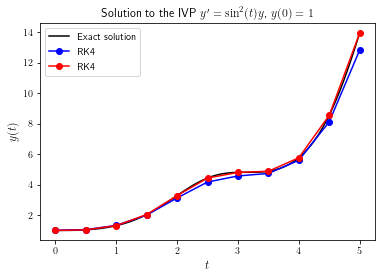

In [7]:
# Define IVP parameters
tspan = [ 0 , 5 ]
y0 = 1
h = 0.5

# Solve the IVP using the RK2 and RK4 methods
t1, y1 = rk2(f, tspan, y0, h)
t2, y2 = rk4(f, tspan, y0, h)

# Output solution table
print(' t     RK2     RK4    Exact\n' + '-' * 28)
for n in range(len(t)):
    print('{:3.2f} {:7.4f} {:7.4f} {:7.4f}'.format(t1[n], y1[n], y2[n], exact_sol(t1[n])))

# Plot solutions
fig, ax = plt.subplots()

t3 = np.linspace(tspan[0], tspan[1], 100)
ax.plot(t3, exact_sol(t3), 'k-', label='Exact solution')
ax.plot(t1, y1, 'bo-', label='RK4')
ax.plot(t2, y2, 'ro-', label='RK4')

ax.set_title("Solution to the IVP $y'=\sin^2(t)y$, $y(0) = 1$")
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$y(t)$', fontsize=12)
ax.legend()

plt.show()

The solution computed by the RK4 method shows very good agreement with the exact solutions. Whilst it is possible to derive higher-order Runge-Kutta methods, in practice the increased accuracy you get is not worth the additional computational cost. The RK4 method is considered the default ODE solver.

---

## Summary

- [Runge-Kutta methods](#Runge-Kutta-Methods) are single step methods that use intermediate stage values to advance the solution over a small step of length $h$ using known values of $t_n$ and $y_n$ to calculate $y_{n+1}=y(t_n + h)$.
- Runge-Kutta methods are commonly expressed in tabular form called a [Butcher tableau](#Butcher-tableau).
- There are two types of Runge-Kutta methods: [explicit and implicit](#Explicit-and-implicit-Runge-Kutta-methods).
- The coefficients of a Runge-Kutta methods are chosen to satisfy the [order conditions](#Derivation-of-a-fourth-order-explicit-Runge-Kutta-method) which are derived by comparing the Taylor series expansion to the general form of the Runge-Kutta method to the equivalent Taylor series expansion of the first-order ODE $y'=f(t, y)$.

---
## Exercises

1. Write the following Runge-Kutta method in a Butcher tableau.

    $$
\begin{aligned}
    y_{n+1} &= y_n + \frac{h}{6}(k_1 + 4k_3 + k_4), \\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + \tfrac{1}{4}h, y_n + \tfrac{1}{4}hk_1), \\
    k_3 &= f(t_n + \tfrac{1}{2}h, y_n + \tfrac{1}{2}hk_2), \\
    k_4 &= f(t_n + h, y_n + h(k_1 - 2k_2 + 2k_3)).
\end{aligned}
$$

2. Write out the equations for the following Runge-Kutta method.

    $$
\begin{array}{c|cccc}
    0 \\
    \frac{1}{4} & \frac{1}{4} \\
    \frac{1}{2} & -\frac{1}{2} & 1 \\
    1 & \frac{1}{4} & 0 & \frac{3}{4} \\ \hline
    & 0 & \frac{4}{9} & \frac{1}{3} & \frac{2}{9}
\end{array}
$$

3. Derive an explicit second-order Runge-Kutta method such that $b_1 = \tfrac{1}{3}$. Express your solution as a Butcher tableau. 

4. Derive an explicit fourth-order Runge-Kutta method such that $b_1=0$ and $c_2 = \tfrac{1}{5}$. Write your answer in the form of a Butcher tableau.

5. Using pen and a calculator and working to 4 decimal places, apply your Runge-Kutta method derived in question 3 to solve the following IVP using a step length of $h=0.4$

    $$y' = ty, \qquad t \in [0, 2], \qquad y(0) = 1. $$

6. Repeat question 5 using the RK4 method (the RK4 method is derived in [example 4](#Example-4)). 

7. Repeat question 5 using Python. The exact solution to this IVP is $y=e^{t^2/2}$. Produce a table comparing the numerical and exact solutions. Produce a plot of the numerical solutions and exact solution on the same set of axes.